In [4]:
import sys
sys.path.append("..")
from ProbabilisticParcellation.util import *
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
from Functional_Fusion.dataset import *
import matplotlib.pyplot as plt
import string
from ProbabilisticParcellation.scripts.parcel_hierarchy import analyze_parcel

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Load fine parcellation and merged models at different levels

In [5]:
atlas = 'MNISymC2'

fine_model = f'/Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68'
fileparts = fine_model.split('/')
split_mn = fileparts[-1].split('_')
info_68, model_68 = load_batch_best(fine_model)
Prop_68 = np.array(model_68.marginal_prob())
parcel_68 = Prop_68.argmax(axis=0) + 1
cmap_68 = cm.read_cmap(f'{model_dir}/Atlases/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68.cmap')

merged_models = [
    f'Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_Kclus-10_Keff-10',
    f'Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_Kclus-14_Keff-12',
    f'Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_Kclus-20_Keff-18',
    f'Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_Kclus-28_Keff-20',
    f'Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_Kclus-34_Keff-22',
    f'Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_Kclus-40_Keff-26',
    f'Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_Kclus-48_Keff-36',
    f'Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_Kclus-56_Keff-36',
    f'Models_03/sym_MdPoNiIbWmDeSo_space-{atlas}_K-68_Kclus-60_Keff-36']

original_models = [f'{m.split("K-")[0]}K-{m.split("Kclus-")[1].split("_")[0]}' for m in merged_models]




FileNotFoundError: /Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68.cmap not found.

In [3]:
m_models = []
m_infos = []
for mname in merged_models:
    info, model = load_batch_best(mname)
    m_models.append(model)
    m_infos.append(info)



In [4]:
n_models = len(m_models)
n_voxels = parcel_68.shape[0]
m_parcels = np.zeros((n_models, n_voxels))

for i, model in enumerate(m_models):
    Prop = np.array(model.marginal_prob())
    parcel = Prop.argmax(axis=0) + 1
    m_parcels[i, :] = parcel

### Fine Parcellation Flatmap

<AxesSubplot: >

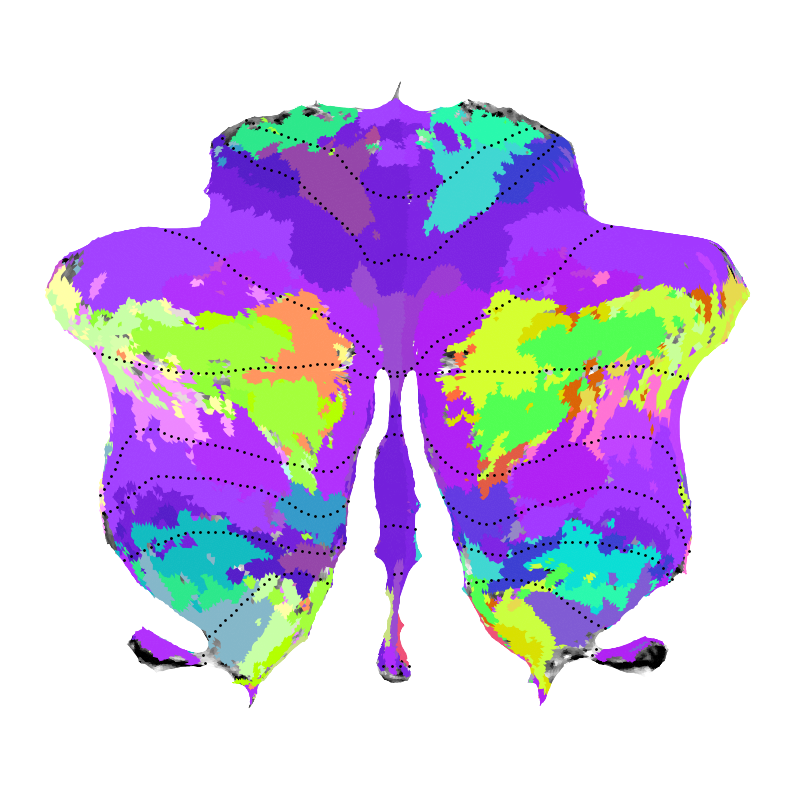

In [ ]:
figsize = [10, 10]
fig = plt.figure(figsize=figsize)
plot_data_flat(parcel_68, atlas,cmap=cmap_68,
               dtype='label',
               render='matplotlib')

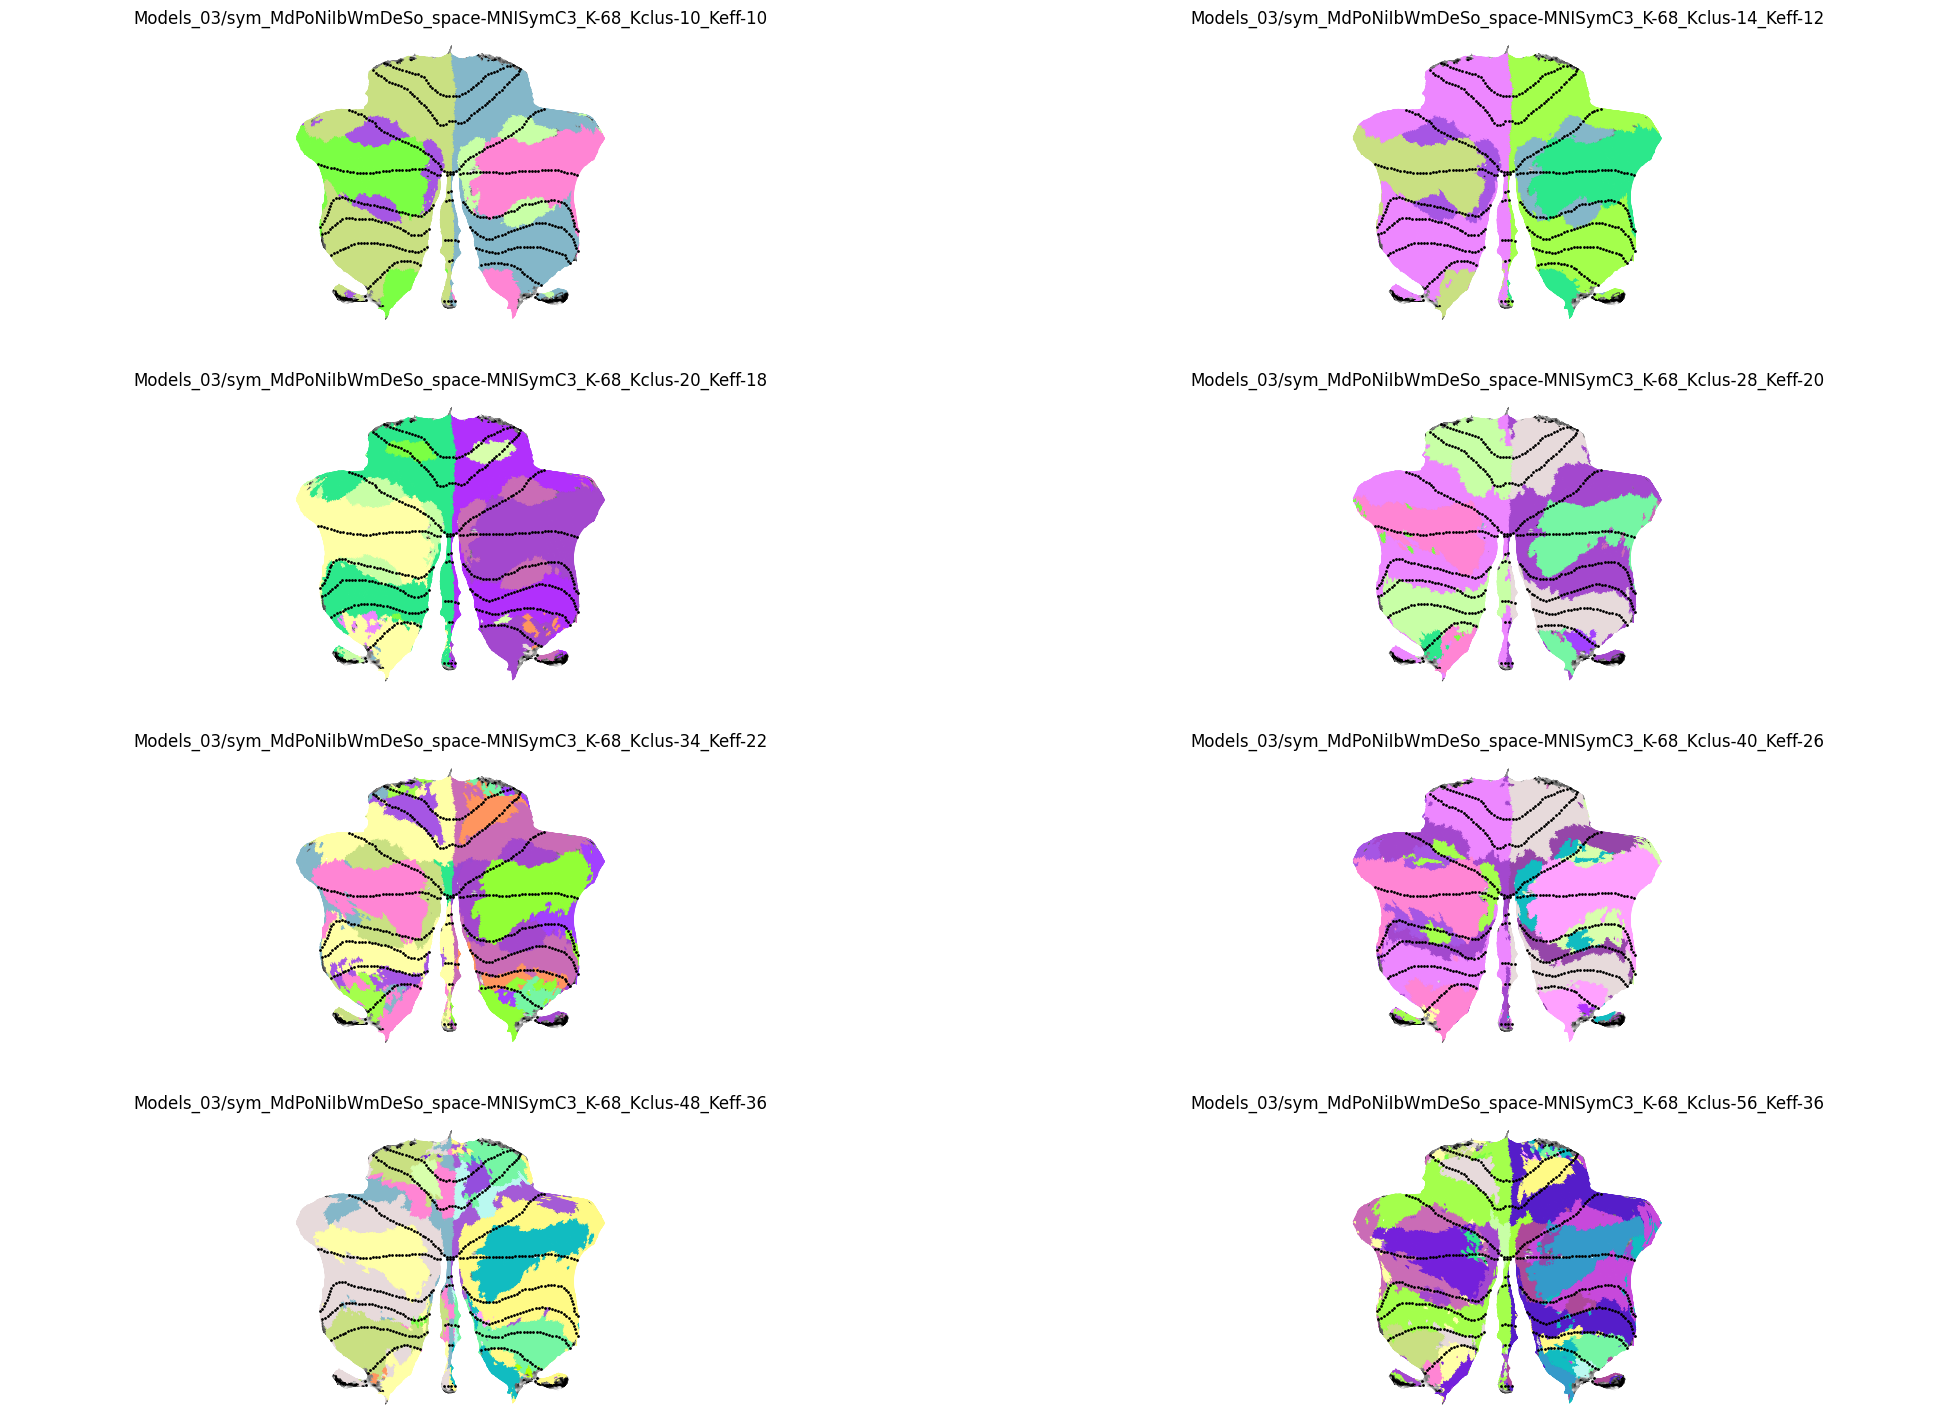

In [7]:
plt.figure(figsize=(25, 18))
plot_multi_flat(m_parcels, atlas, grid=(int(np.ceil(n_models/2)), 2),
                dtype='label', cmap=cmap_68, colorbar=False, titles=merged_models, save_fig=False)
